In [1]:
import urllib
import PIL
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import PIL.Image
import urllib.request
import os
import collections
import asyncio
%matplotlib inline

In [2]:
def get_image(url):
    # image = cv2.imread(img)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    imageRGB = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return imageRGB

downloading : http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T14.png success!!


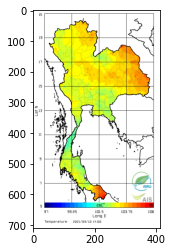

In [3]:
url_img = "http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T14.png"
print("downloading : %s success!!" % url_img)
image = get_image(url_img)
plt.imshow(image)
plt.show()